
<h3>Part 1: Construct the CNN Architecture and train the model with real data</h3>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt
import os
from PIL import Image

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Activation
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import SeparableConv2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.callbacks import ModelCheckpoint
from keras import optimizers,regularizers

In [ ]:
DATA_DIR = "drive/MyDrive/chest_xray"
TEST_NORMAL = "drive/MyDrive/chest_xray/test/NORMAL"
TRAIN_NORMAL = "drive/MyDrive/chest_xray/train/NORMAL"
VALIDATION_NORMAl = "drive/MyDrive/chest_xray/val/NORMAL"
TEST_PNEUMONIA = "drive/MyDrive/chest_xray/test/PNEUMONIA"
TRAIN_PNEUMONIA = "drive/MyDrive/chest_xray/train/PNEUMONIA"
VALIDATION_NORMAl = "drive/MyDrive/chest_xray/val/PNEUMONIA"

Text(0.5, 1.0, 'pneumonia')

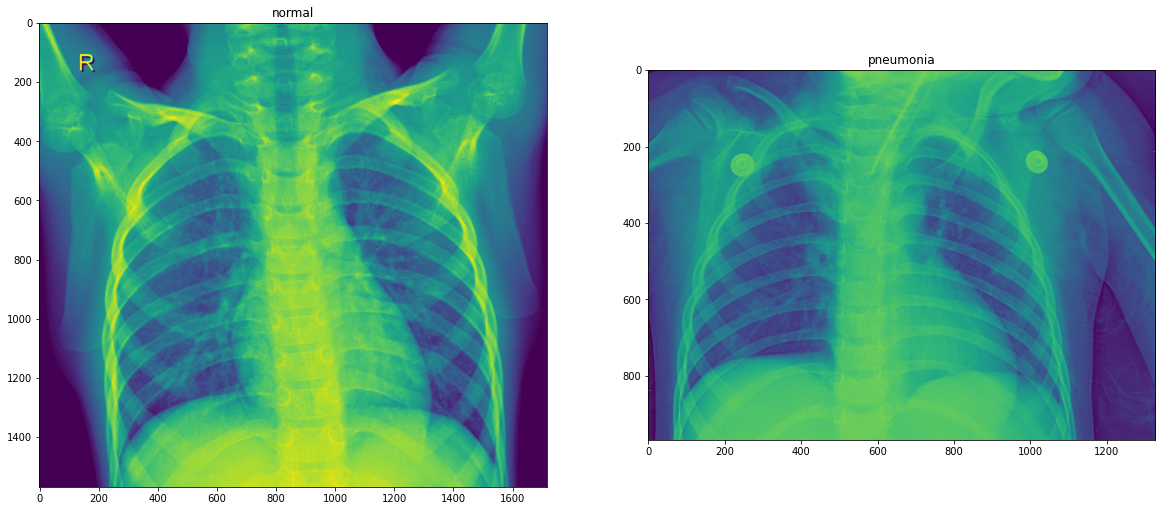

In [ ]:
import random
rand_normal = random.choice(os.listdir(TRAIN_NORMAL))
rand_pnemonia = random.choice(os.listdir(TRAIN_PNEUMONIA))

nor_im = Image.open(TRAIN_NORMAL + "/"+rand_normal)
pne_im = Image.open(TRAIN_PNEUMONIA + "/"+rand_pnemonia)

a = plt.figure(figsize=(20,10))

a1 = a.add_subplot(1,2,1)
imgplot = plt.imshow(nor_im)
a1.set_title("normal")

a2 = a.add_subplot(1,2,2)
imgplot = plt.imshow(pne_im)
a2.set_title("pneumonia")

In [ ]:
adama = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
train_gen = ImageDataGenerator(shear_range=0.2,horizontal_flip=True,rescale=1.0/255)

test_gen = ImageDataGenerator(rescale=1.0/255)
train_set = train_gen.flow_from_directory(directory="drive/MyDrive/chest_xray/train",
                                                  target_size = (128,128),
                                                  batch_size = 32,
                                                  class_mode="binary")
test_set = test_gen.flow_from_directory(directory="drive/MyDrive/chest_xray/test",
                                                  target_size = (128,128),
                                                  batch_size = 32,
                                                  class_mode="binary")
val_set = test_gen.flow_from_directory(directory="drive/MyDrive/chest_xray/val",
                                                  target_size = (128,128),
                                                  batch_size = 32,
                                                  class_mode="binary")

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation="relu", input_shape=(128,128,3),name="conv_1.1"))
model.add(Conv2D(32,(3,3),activation="relu",name="conv_1.2"))
model.add(MaxPooling2D((2,2),name="pool_1"))

model.add(SeparableConv2D(64,(3,3),activation="relu",name="conv_2.1"))
model.add(SeparableConv2D(64,(3,3),activation="relu",name="conv_2.2"))
model.add(MaxPooling2D((2,2),name="pool_2"))

model.add(SeparableConv2D(64,(3,3),name="conv_3.1"))
model.add(BatchNormalization(name='bn_3.1'))
model.add(Activation("relu"))
model.add(SeparableConv2D(64,(3,3),activation="relu",name="conv_3.2"))
model.add(MaxPooling2D((2,2),name="pool_3"))

model.add(SeparableConv2D(128,(3,3),name="conv_4.1"))
model.add(BatchNormalization(name='bn_4.1'))
model.add(Activation("relu"))
model.add(SeparableConv2D(128,(3,3),activation="relu",name="conv_4.2"))
model.add(MaxPooling2D((2,2),name="pool_4"))

model.add(Flatten())

model.add(Dense(activation="relu",units=128,
                kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.7,name="Drop_2"))
model.add(Dense(activation="sigmoid",units=1))

model.compile(optimizer=adama,loss = "binary_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1.1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
conv_1.2 (Conv2D)            (None, 124, 124, 32)      9248      
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 62, 62, 32)        0         
_________________________________________________________________
conv_2.1 (SeparableConv2D)   (None, 60, 60, 64)        2400      
_________________________________________________________________
conv_2.2 (SeparableConv2D)   (None, 58, 58, 64)        4736      
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 29, 29, 64)        0         
_________________________________________________________________
conv_3.1 (SeparableConv2D)   (None, 27, 27, 64)       

In [ ]:
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
xray_model = model.fit_generator(train_set,
                                steps_per_epoch = 163,
                                callbacks=callbacks_list,
                                epochs = 20,
                                validation_data = test_set,
                                validation_steps = 624//32)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
163/163 [==============================] - 2465s 15s/step - loss: 0.6701 - accuracy: 0.8175 - val_loss: 0.7005 - val_accuracy: 0.6250
Epoch 2/20
163/163 [==============================] - 308s 2s/step - loss: 0.2323 - accuracy: 0.9296 - val_loss: 0.6603 - val_accuracy: 0.8076
Epoch 3/20
163/163 [==============================] - 306s 2s/step - loss: 0.1733 - accuracy: 0.9526 - val_loss: 0.8787 - val_accuracy: 0.6365
Epoch 4/20
163/163 [==============================] - 306s 2s/step - loss: 0.1633 - accuracy: 0.9578 - val_loss: 0.4566 - val_accuracy: 0.8207
Epoch 5/20
163/163 [==============================] - 306s 2s/step - loss: 0.1387 - accuracy: 0.9630 - val_loss: 0.9195 - val_accuracy: 0.7352
Epoch 6/20
163/163 [==============================] - 304s 2s/step - loss: 0.1343 - accuracy: 0.9641 - val_loss: 0.5588 - val_accuracy: 0.7747
Epoch 7/20
163/163 [==============================] - 304s 2s/step - loss: 0.1235 - accuracy: 0.9680 - val_loss: 1.1702 - val_accuracy: 0.69

In [ ]:
model.save('model.h5')

In [ ]:
test_accu = model.evaluate_generator(test_set,steps=624//32)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [ ]:
test_accu

[1.5815421342849731, 0.7023026347160339]

In [ ]:
plt.plot(xray_model.history['acc'])
plt.plot(xray_model.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [ ]:
plt.plot(xray_model.history['val_acc'],c='g')
plt.plot(xray_model.history['acc'],c='b')